In [3]:
who

Interactive namespace is empty.


# TODO
- ALT QUESTION: which LR differences are predictive of age?
- get errors (dispersion) instead of correlation
- inspect >1 correlations

# NOTES


In [1]:
%connect_info

{
  "shell_port": 50671,
  "iopub_port": 40605,
  "stdin_port": 42751,
  "control_port": 38837,
  "hb_port": 45373,
  "ip": "127.0.0.1",
  "key": "a7d4294e-dbb2f7ecdc939981627bf99c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-daecf82c-b5c4-49ff-9029-42ff14b7f196.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [4]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from vacou import *
from plots import *
import regtest.regtest as rt

from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(font="monospace")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
d_or, md, full_df = preprocess_vc(version = 6, use_vars_fp='data/use_variables.csv')

Mouse-size normalized data. Laterality


In [6]:
# unified colours for groups
color_map = dict(zip(['Y', 'A'],
                     [
                        sns.color_palette("Set2")[0],
                        sns.color_palette("Set2")[1],
                     ]
                    ))
color_mapYAT = dict(zip(['AC', 'AT', 'YC'],
                     [
                        sns.color_palette("Set2")[1],
                        sns.color_palette("Set2")[2],
                        sns.color_palette("Set2")[0],
                     ]
                    ))

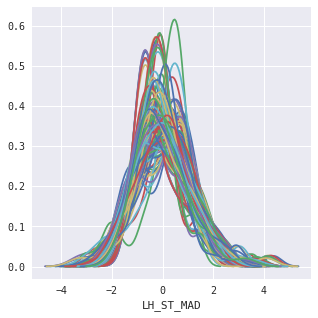

In [7]:
d=d_or
#d = normalize_pd(d, axis=0)
d = scale_pd(d, axis=0)
d = mean_center_pd(d)
#d = maxabs_scale_pd(d, axis=0)

fig, ax = plt.subplots(figsize=(5,5))
for c in d:
    sns.distplot(d[c], hist=False)

In [8]:
d.index.get_level_values(2)

Index(['1.1', '1.2', '1.3', '1.4', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3',
       '4.4', '5.1', '5.2', '5.3', '5.4', '1.1', '1.2', '1.3', '1.4', '2.1',
       '2.2', '2.3', '2.4', '3.1', '3.2', '1.1', '1.2', '1.3', '1.4', '2.1',
       '2.2', '2.3', '2.4', '3.1', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3',
       '4.4', '5.1', '5.2', '5.3', '5.4'],
      dtype='object', name='Animal')

In [9]:
[i for i in d.columns]

['mouse length (cm)',
 'Normalized average run speed',
 'RF_Stand_(s)_Mean',
 'RF_StandIndex_Mean',
 'RF_MaxContactAt_(%)_Mean',
 'RF_MaxContactArea_(cm²)_Mean',
 'RF_MaxContactMaxIntensity_Mean',
 'RF_MaxContactMeanIntensity_Mean',
 'RF_PrintLength_(cm)_Mean',
 'RF_PrintWidth_(cm)_Mean',
 'RF_PrintArea_(cm²)_Mean',
 'RF_MaxIntensityAt_(%)_Mean',
 'RF_MaxIntensity_Mean',
 'RF_MinIntensity_Mean',
 'RF_MeanIntensity_Mean',
 'RF_MeanIntensityOfThe15MostIntensePixels_Mean',
 'RF_Swing_(s)_Mean',
 'RF_SwingSpeed_(cm/s)_Mean',
 'RF_StrideLength_(cm)_Mean',
 'RF_StepCycle_(s)_Mean',
 'RF_DutyCycle_(%)_Mean',
 'RF_SingleStance_(s)_Mean',
 'RF_InitialDualStance_(s)_Mean',
 'RF_TerminalDualStance_(s)_Mean',
 'RF_BodySpeed_(cm/s)_Mean',
 'RH_Stand_(s)_Mean',
 'RH_StandIndex_Mean',
 'RH_MaxContactAt_(%)_Mean',
 'RH_MaxContactArea_(cm²)_Mean',
 'RH_MaxContactMaxIntensity_Mean',
 'RH_MaxContactMeanIntensity_Mean',
 'RH_PrintLength_(cm)_Mean',
 'RH_PrintWidth_(cm)_Mean',
 'RH_PrintArea_(cm²)_Mean',
 

In [10]:
#sd, smd, sfull_df = preprocess_vc(sep_runs_data_fp, version = 3, use_vars_fp='data/use_variables.csv')

# Explore parameters

## 1. heatmap of parameters

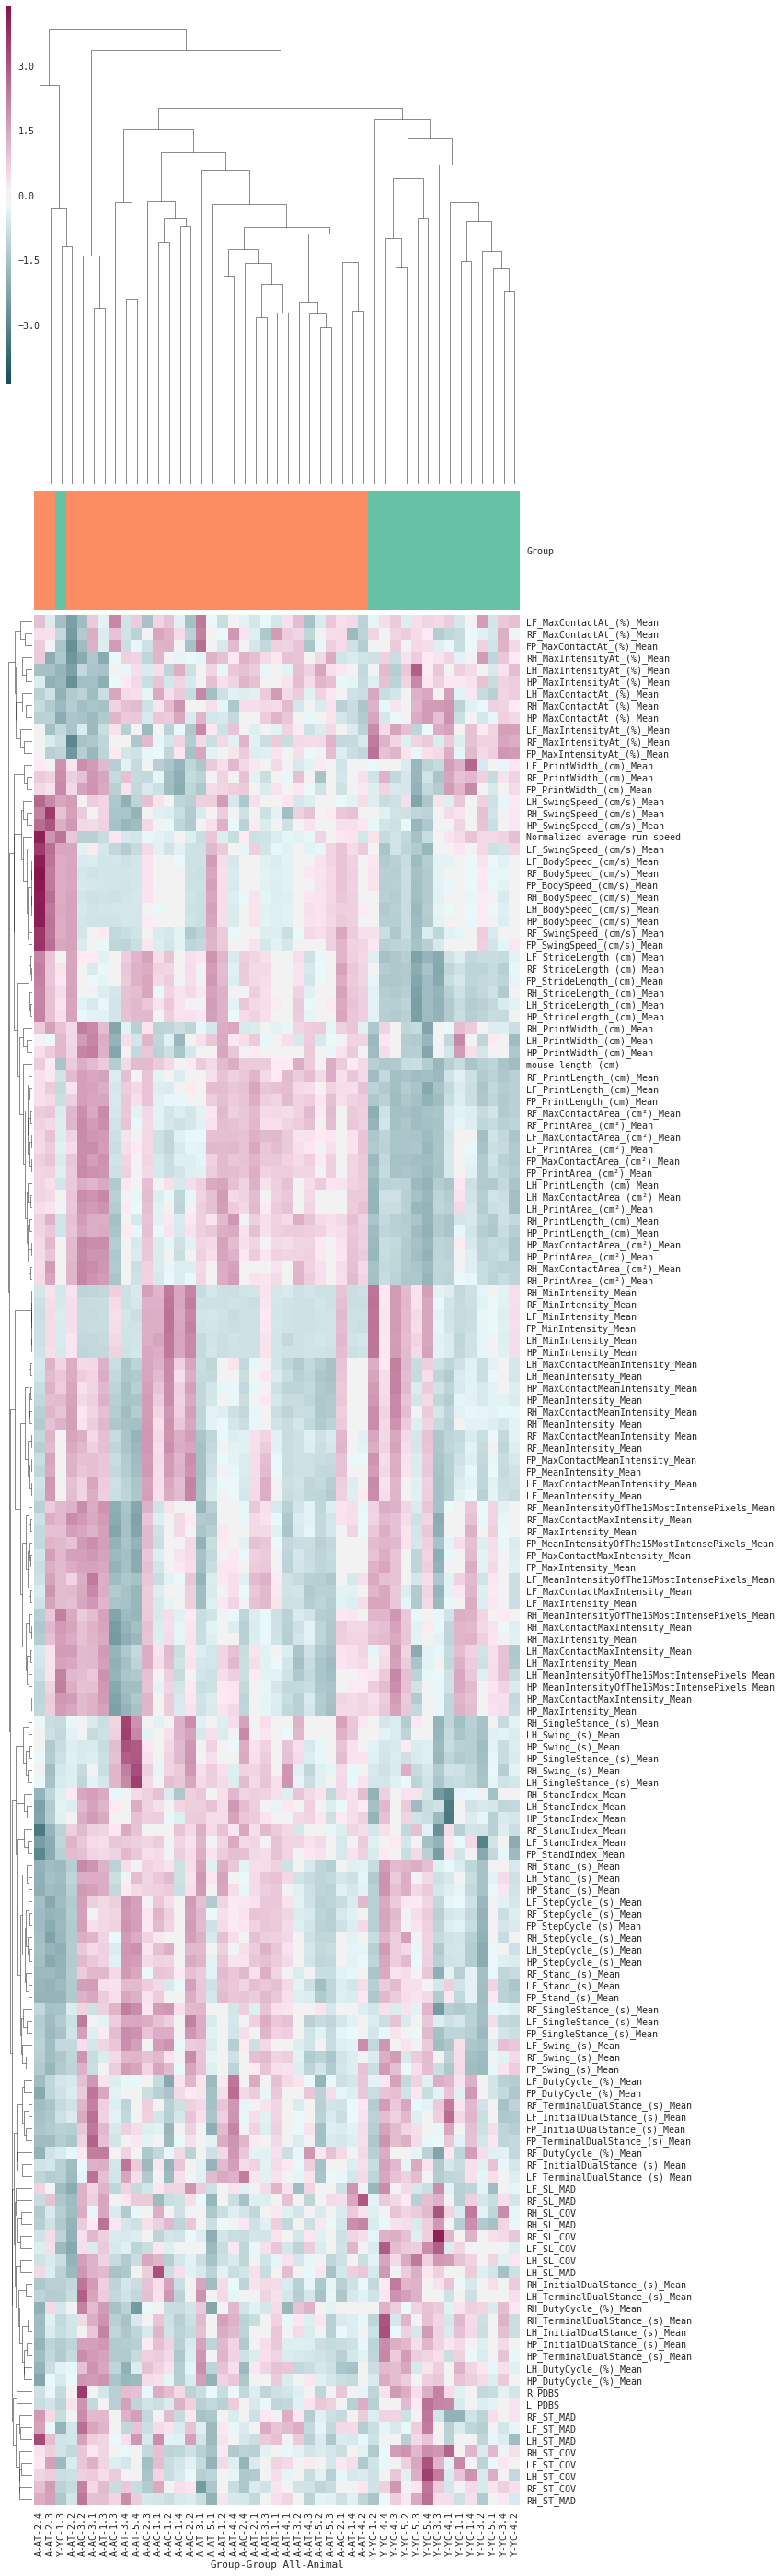

In [11]:
heatmap_with_levels(d.T, use_index_level='Group', figsize=(10,50));

## 2. I'd like to know which variables seem promising.

In [12]:
selected_a, _ = sel_anova(d, md['Group'], mode = 'classif')
print("Features selected by f_regression")
selected_a.ix[selected_a.pval < 0.05]

Features selected by f_regression


,param,pval
0,mouse length (cm),5.771471e-16
100,FP_PrintLength_(cm)_Mean,1.274370e-14
54,LF_PrintLength_(cm)_Mean,5.442695e-14
8,RF_PrintLength_(cm)_Mean,1.743071e-13
123,HP_PrintLength_(cm)_Mean,1.799055e-12
77,LH_PrintLength_(cm)_Mean,2.718884e-12
31,RH_PrintLength_(cm)_Mean,5.487773e-11
97,FP_MaxContactArea_(cm²)_Mean,8.070878e-10
5,RF_MaxContactArea_(cm²)_Mean,9.771617e-10
102,FP_PrintArea_(cm²)_Mean,2.148454e-09


Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: Y, orange: A)


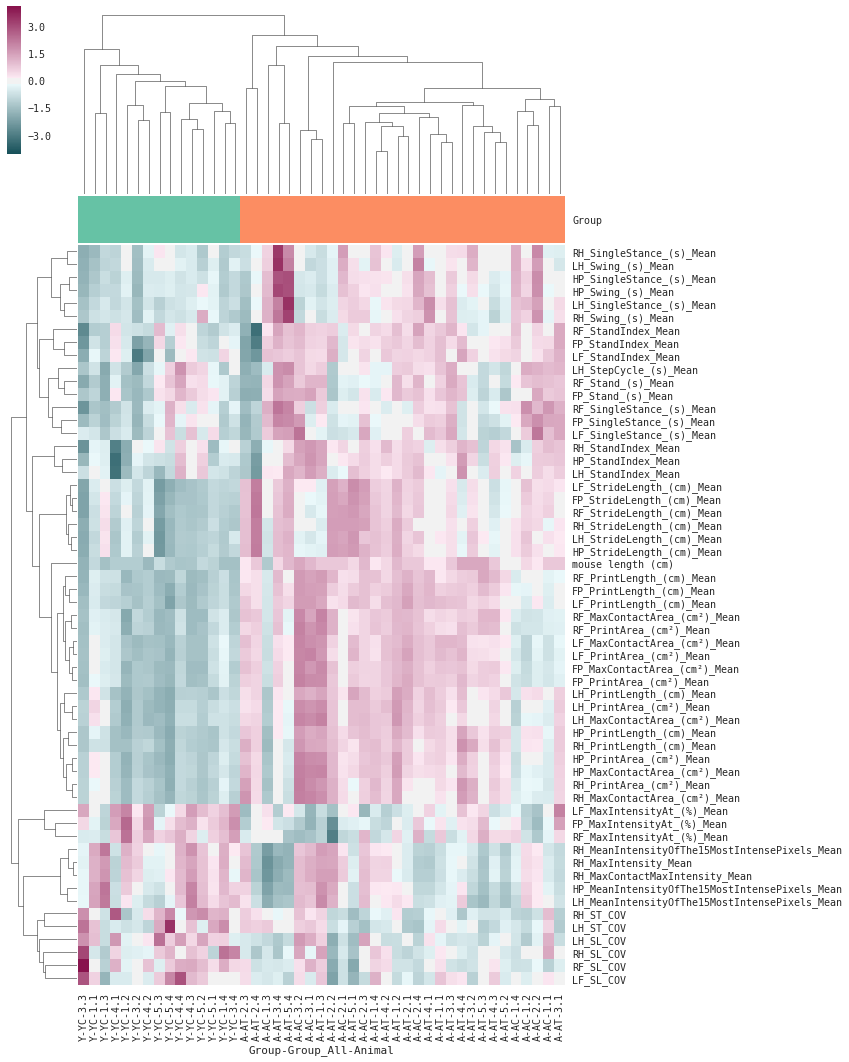

In [13]:
sel = selected_a.param[selected_a.pval < 0.05].tolist()
heatmap_with_levels(d.T.loc[sel], use_index_level='Group', figsize=(10,18));
print("Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: Y, orange: A)")

Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: YC, orange: AC, blue: AT)


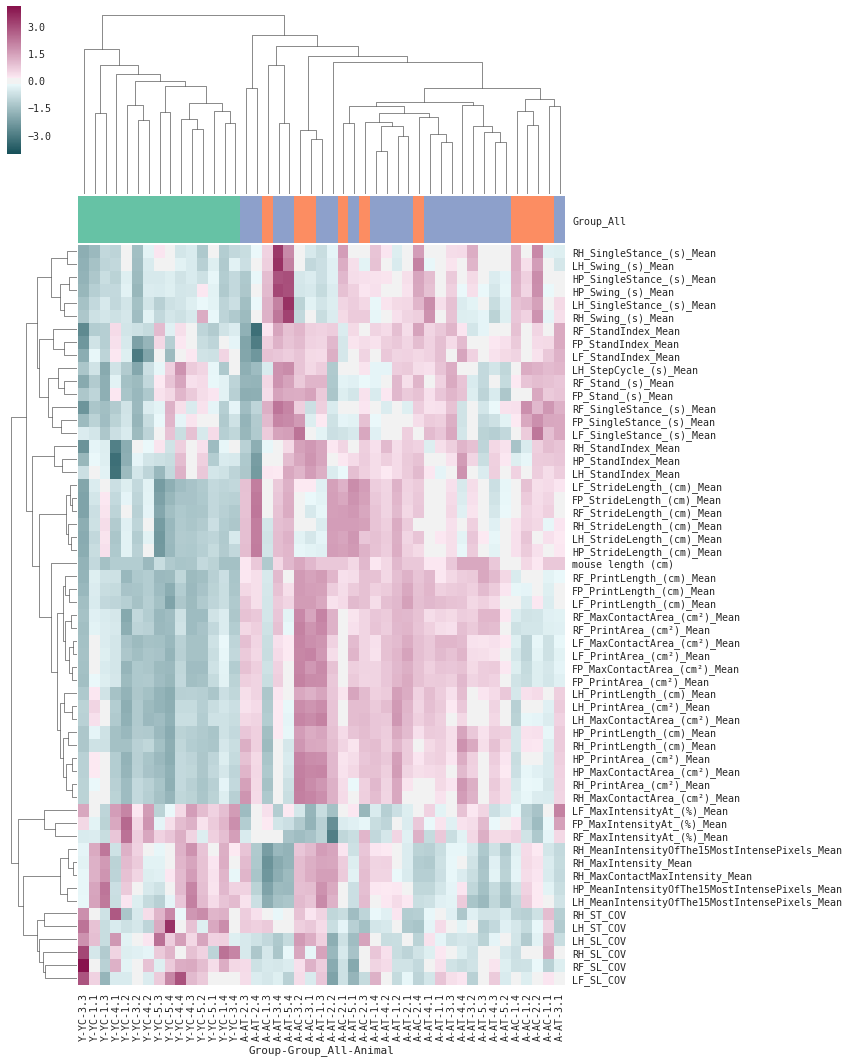

In [14]:
sel = selected_a.param[selected_a.pval < 0.05].tolist()
heatmap_with_levels(d.T.loc[sel], use_index_level='Group_All', figsize=(10,18));
print("Heatmap of values of parameters with a p-value < 0.05, clustered according to the numerical value, coloured by mouse group (green: YC, orange: AC, blue: AT)")

## 3. Plot the aggregate parameters

Plot coefficients of variation:

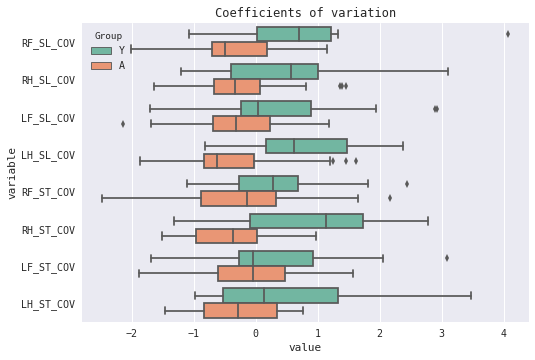

In [53]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('COV')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

Collapse left and right parameters:

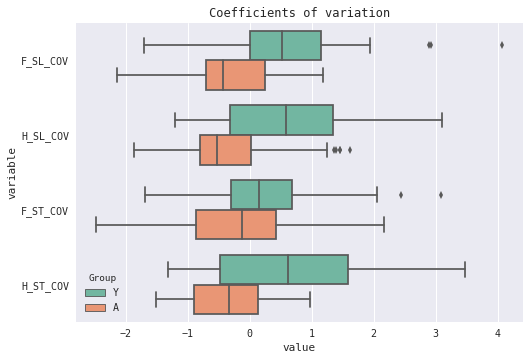

In [54]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

Just as another way to visualize this:

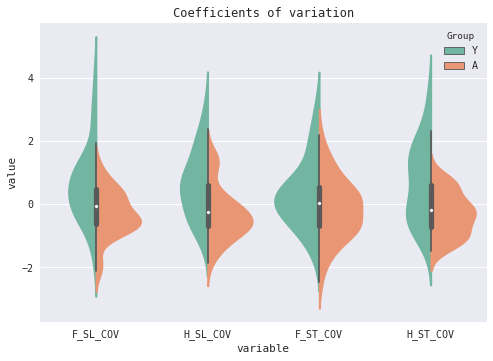

In [55]:
sns.violinplot(y="value", x="variable", hue="Group", data=d_,
               split=True, palette=color_map);
plt.title('Coefficients of variation');

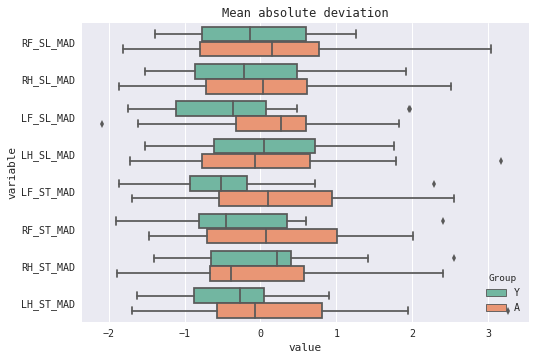

In [56]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

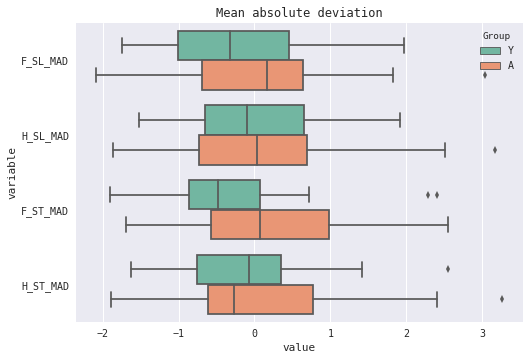

In [57]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

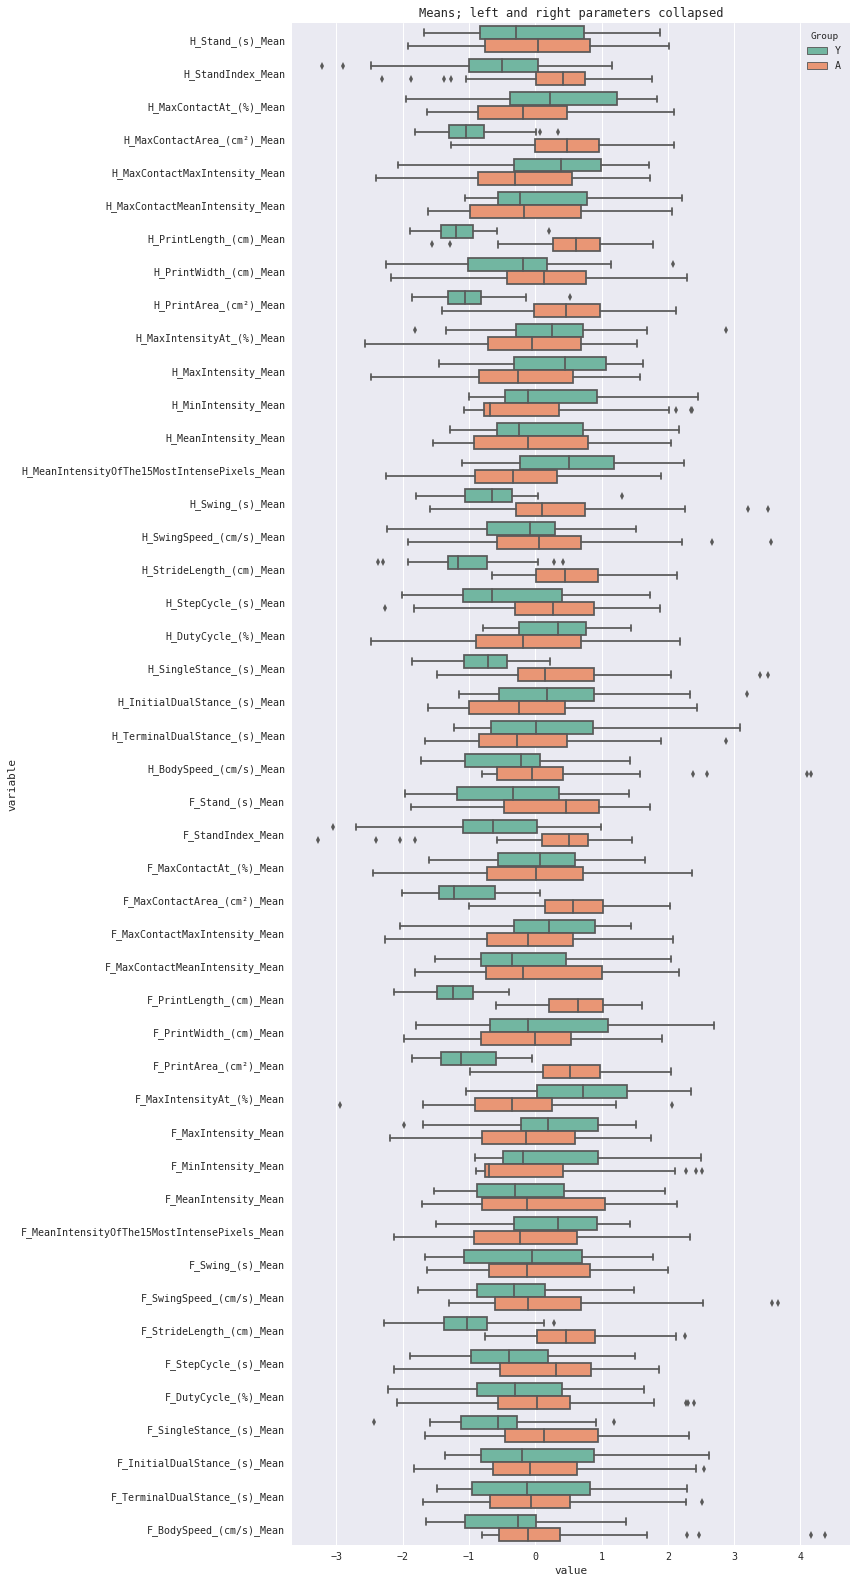

In [58]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = only_LR(d).ix[:,only_LR(d).columns.str.contains('Mean')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
plt.figure(figsize=(10, 28))
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Means; left and right parameters collapsed');

# Left side - right side relationships - 'laterality'
Values in the table are correlations between each left-side gait parameter and the corresponding right-seid gait parameter. Lowest correlations are sorted first.

Parameters:

- correlation - using sklearn pairwise_distances
- ma_difference - pointwise mean absolute difference ( mean(abs(L-R)) )
- covariance - between the two numeric vectors
- mse - mean squared error (regression line-based)

### 1. First, let's compare Y and A

In [15]:
madiff = dist_L_R(d, metric='ma_difference', use_level=0)
covs = dist_L_R(d, metric='covariance', use_level=0)
corrs = dist_L_R(d, metric='correlation', use_level=0)
mse = dist_L_R(d, metric='mse', use_level=0)

In [16]:
#corrs.groupby(corrs.index.get_level_values(0)).apply(lambda x: x.sort_values('correlation', ascending=True))
#corrs.sort_values('correlation', ascending=True).head(10)

In [17]:
distances = pd.merge(corrs, madiff)
distances = pd.merge(distances, covs)
distances = pd.merge(distances, mse)

In [18]:
print("Various co-measures between the left and right side parameter")
distances.sort_values('correlation', ascending=True)

Various co-measures between the left and right side parameter


,group,parameter,correlation,ma_difference,covariance,mse
83,Y,H_InitialDualStance_(s)_Mean,-0.039210,1.194399,-0.040442,2.062019
106,Y,H_Swing_(s)_Mean,0.147617,0.532609,0.055068,0.608287
56,Y,F_InitialDualStance_(s)_Mean,0.150308,1.079551,0.160981,1.755471
55,Y,F_DutyCycle_(%)_Mean,0.180950,0.966008,0.170391,1.578886
107,Y,H_TerminalDualStance_(s)_Mean,0.204711,0.986410,0.206941,1.575716
58,Y,F_MaxContactAt_(%)_Mean,0.230311,0.765082,0.142545,1.000706
7,A,F_MaxIntensityAt_(%)_Mean,0.286897,0.886795,0.231357,1.121986
16,A,F_SL_MAD,0.292829,0.994045,0.289769,1.398226
80,Y,F_TerminalDualStance_(s)_Mean,0.305942,0.874921,0.312659,1.472750
96,Y,H_SL_COV,0.350248,1.052523,0.391329,1.511615


###### Group by parameter name for easier comparison:

In [19]:
distances.groupby('parameter').apply(lambda x: x.sort_values('correlation', ascending=True)).drop('parameter',1)

group  correlation  \
parameter                                                             
F_BodySpeed_(cm/s)_Mean                      54      Y     0.993493   
                                             0       A     0.996467   
F_DutyCycle_(%)_Mean                         55      Y     0.180950   
                                             1       A     0.439237   
F_InitialDualStance_(s)_Mean                 56      Y     0.150308   
                                             2       A     0.462099   
F_MaxContactArea_(cm²)_Mean                  57      Y     0.818157   
                                             3       A     0.843637   
F_MaxContactAt_(%)_Mean                      58      Y     0.230311   
                                             4       A     0.636898   
F_MaxContactMaxIntensity_Mean                5       A     0.888920   
                                             59      Y     0.900033   
F_MaxContactMeanIntensity_Mean               6       A     0.915467   
                                             60      Y     0.953354   
F_MaxIntensityAt_(%)_Mean                    7       A     0.286897   
                                             61      Y     0.500985   
F_MaxIntensity_Mean                          8       A     0.868403   
                                             62      Y     0.910316   
F_MeanIntensityOfThe15MostIntensePixels_Mean 9       A     0.852771   
                                             63      Y     0.864976   
F_MeanIntensity_Mean                         10      A     0.922840   
                                             64      Y     0.946123   
F_MinIntensity_Mean                          11      A     0.996904   
                                             65      Y     0.997308   
F_PrintArea_(cm²)_Mean                       66      Y     0.851762   
                                             12      A     0.863200   
F_PrintLength_(cm)_Mean                      13      A     0.764679   
                                             67      Y     0.777695   
F_PrintWidth_(cm)_Mean                       14      A     0.724384   
                                             68      Y     0.790064   
...                                                ...          ...   
H_PrintArea_(cm²)_Mean                       39      A     0.764479   
                                             93      Y     0.875691   
H_PrintLength_(cm)_Mean                      40      A     0.750512   
                                             94      Y     0.808887   
H_PrintWidth_(cm)_Mean                       41      A     0.649656   
                                             95      Y     0.842189   
H_SL_COV                                     96      Y     0.350248   
                                             42      A     0.657546   
H_SL_MAD                                     97      Y     0.361410   
                                             43      A     0.397603   
H_ST_COV                                     98      Y     0.497619   
                                             44      A     0.836970   
H_ST_MAD                                     45      A     0.631872   
                                             99      Y     0.640842   
H_SingleStance_(s)_Mean                      100     Y     0.429209   
                                             46      A     0.622129   
H_StandIndex_Mean                            101     Y     0.663815   
                                             47      A     0.709529   
H_Stand_(s)_Mean                             48      A     0.877485   
                                             102     Y     0.901777   
H_StepCycle_(s)_Mean                         103     Y     0.902158   
                                             49      A     0.903861   
H_StrideLength_(cm)_Mean                     50      A     0.925320   
                                             104     Y     0.929059   
H_

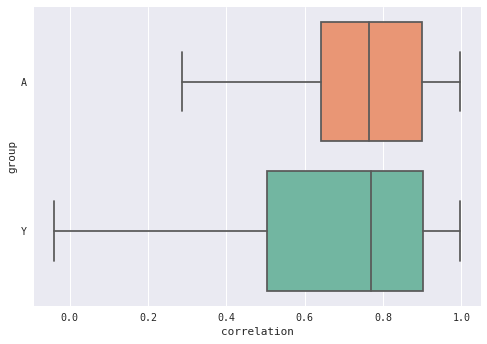

In [20]:
corrs_ = corrs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=corrs_, x='correlation', y='group', palette = color_map)#, hue='Group_All')

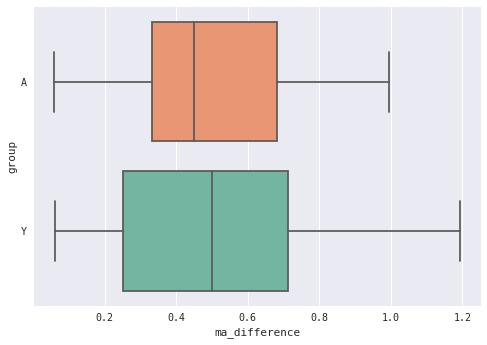

In [21]:
madiff_ = madiff.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=madiff_, x='ma_difference', y='group', palette = color_map)#, hue='Group_All')

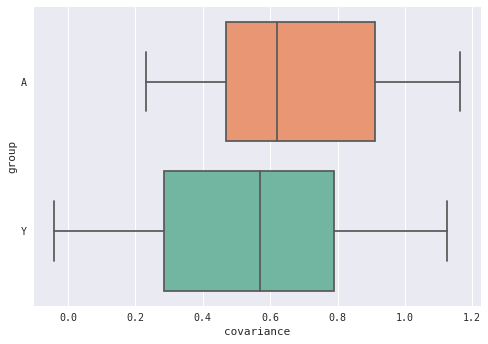

In [22]:
covs_ = covs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=covs_, x='covariance', y='group', palette = color_map)#, hue='Group_All')

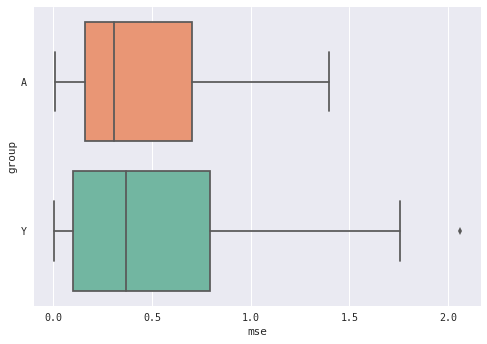

In [23]:
mse_ = mse.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=mse_, x='mse', y='group', palette=color_map)#, hue='Group_All')

### 2. Now, let's compare YC with AC and AT

In [24]:
madiff = dist_L_R(full_df, metric='ma_difference', use_level=1)
covs = dist_L_R(full_df, metric='covariance', use_level=1)
corrs = dist_L_R(d, metric='correlation', use_level=1)
mse = dist_L_R(d, metric='mse', use_level=1)

In [25]:
distances = pd.merge(corrs, madiff)
distances = pd.merge(distances, covs)
distances = pd.merge(distances, mse)

In [26]:
print("Various co-measures between the left and right side parameter")
distances.sort_values('correlation', ascending=True)

Various co-measures between the left and right side parameter


,group,parameter,correlation,ma_difference,covariance,mse
137,YC,H_InitialDualStance_(s)_Mean,-0.039210,0.032621,-0.000031,2.062019
15,AC,F_SL_COV,0.066838,0.018882,0.000028,0.575859
160,YC,H_Swing_(s)_Mean,0.147617,0.014367,0.000042,0.608287
110,YC,F_InitialDualStance_(s)_Mean,0.150308,0.014356,0.000027,1.755471
43,AC,H_SL_MAD,0.151218,0.248237,0.005012,1.953660
16,AC,F_SL_MAD,0.166582,0.147491,0.002705,1.512153
109,YC,F_DutyCycle_(%)_Mean,0.180950,2.658571,1.277986,1.578886
95,AT,H_PrintWidth_(cm)_Mean,0.182445,0.068937,0.000863,0.750315
161,YC,H_TerminalDualStance_(s)_Mean,0.204711,0.027306,0.000163,1.575716
112,YC,F_MaxContactAt_(%)_Mean,0.230311,4.134189,4.275467,1.000706


###### Group by parameter name for easier comparison:

In [27]:
distances.groupby('parameter').apply(lambda x: x.sort_values('correlation', ascending=True)).drop('parameter',1)

group  correlation  \
parameter                                                             
F_BodySpeed_(cm/s)_Mean                      0      AC     0.987163   
                                             108    YC     0.993493   
                                             54     AT     0.997089   
F_DutyCycle_(%)_Mean                         109    YC     0.180950   
                                             1      AC     0.381879   
                                             55     AT     0.475796   
F_InitialDualStance_(s)_Mean                 110    YC     0.150308   
                                             2      AC     0.351501   
                                             56     AT     0.590656   
F_MaxContactArea_(cm²)_Mean                  57     AT     0.565068   
                                             111    YC     0.818157   
                                             3      AC     0.974780   
F_MaxContactAt_(%)_Mean                      112    YC     0.230311   
                                             58     AT     0.576356   
                                             4      AC     0.827517   
F_MaxContactMaxIntensity_Mean                59     AT     0.878417   
                                             5      AC     0.895799   
                                             113    YC     0.900033   
F_MaxContactMeanIntensity_Mean               6      AC     0.860515   
                                             60     AT     0.899182   
                                             114    YC     0.953354   
F_MaxIntensityAt_(%)_Mean                    7      AC     0.245939   
                                             61     AT     0.317276   
                                             115    YC     0.500985   
F_MaxIntensity_Mean                          62     AT     0.848967   
                                             8      AC     0.897771   
                                             116    YC     0.910316   
F_MeanIntensityOfThe15MostIntensePixels_Mean 63     AT     0.831052   
                                             117    YC     0.864976   
                                             9      AC     0.875415   
...                                                ...          ...   
H_ST_COV                                     152    YC     0.497619   
                                             98     AT     0.830326   
                                             44     AC     0.847783   
H_ST_MAD                                     45     AC     0.411018   
                                             153    YC     0.640842   
                                             99     AT     0.738801   
H_SingleStance_(s)_Mean                      154    YC     0.429209   
                                             100    AT     0.613269   
                                             46     AC     0.641823   
H_StandIndex_Mean                            47     AC     0.558564   
                                             155    YC     0.663815   
                                             101    AT     0.792968   
H_Stand_(s)_Mean                             102    AT     0.875981   
                                             48     AC     0.891508   
                                             156    YC     0.901777   
H_StepCycle_(s)_Mean                         49     AC     0.457580   
                                             157    YC     0.902158   
                                             103    AT     0.969631   
H_StrideLength_(cm)_Mean                     50     AC     0.791291   
                                             158    YC     0.929059   
                                             104    AT     0.986301   
H_SwingSpeed_(cm/s)_Mean                     51     AC     0.689266   
                                             105    AT     0.705676   
                                             159    YC     0.780063   
H_

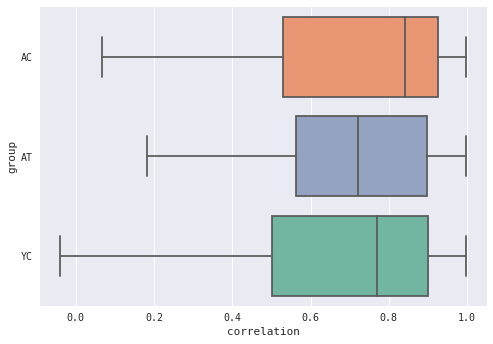

In [28]:
corrs_ = corrs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=corrs_, x='correlation', y='group', palette = color_mapYAT)#, hue='Group_All')

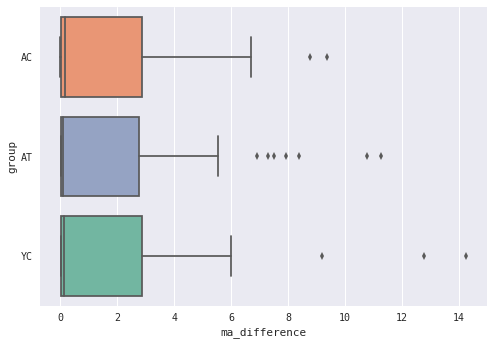

In [29]:
madiff_ = madiff.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=madiff_, x='ma_difference', y='group', palette = color_mapYAT)#, hue='Group_All')

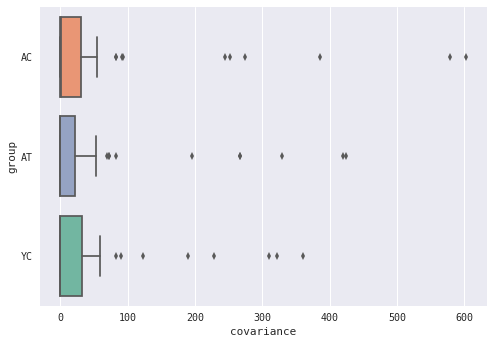

In [30]:
covs_ = covs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=covs_, x='covariance', y='group', palette = color_mapYAT)#, hue='Group_All')

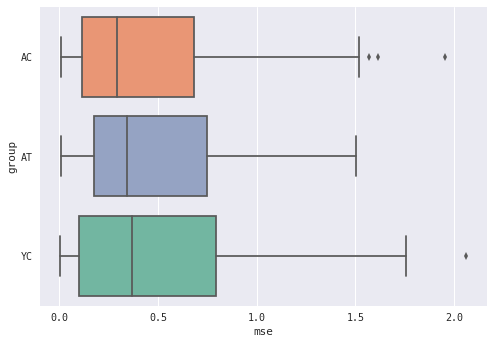

In [31]:
mse_ = mse.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=mse_, x='mse', y='group', palette = color_mapYAT)#, hue='Group_All')

### Visualize with heatmaps

How correlated are sided parameters?

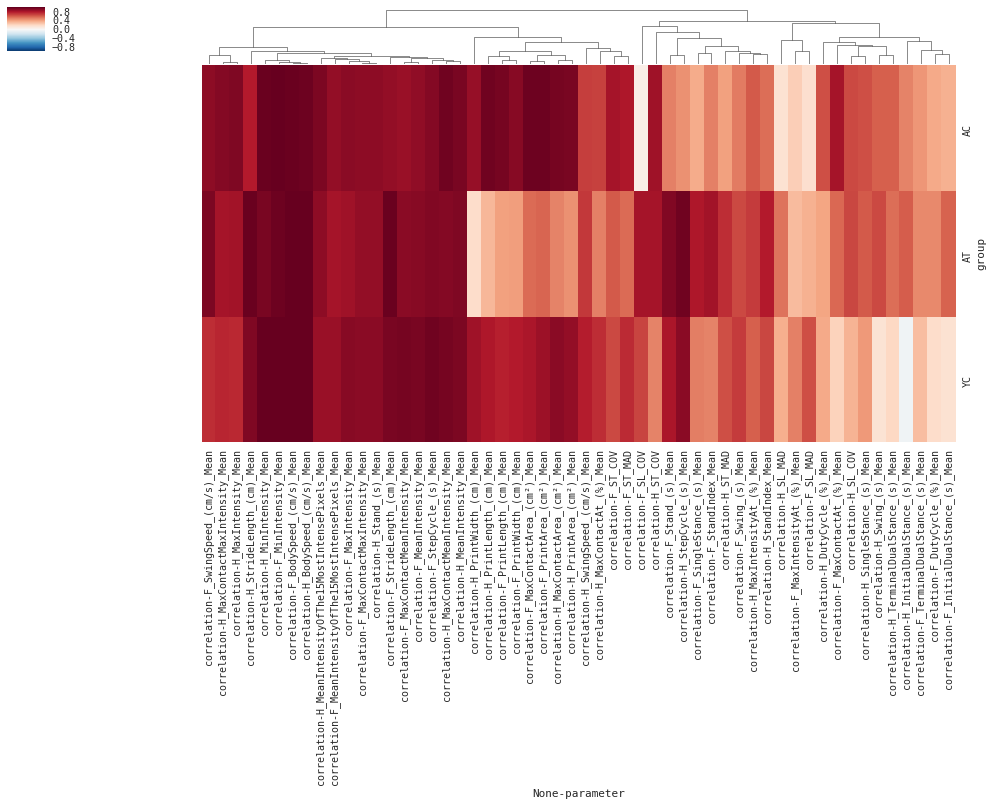

In [49]:
#plt.figure( figsize=(5,17))
sns.clustermap(corrs.pivot_table(columns='parameter', index='group'), row_cluster=False, figsize=(17,8));

What about the mean absolute difference?

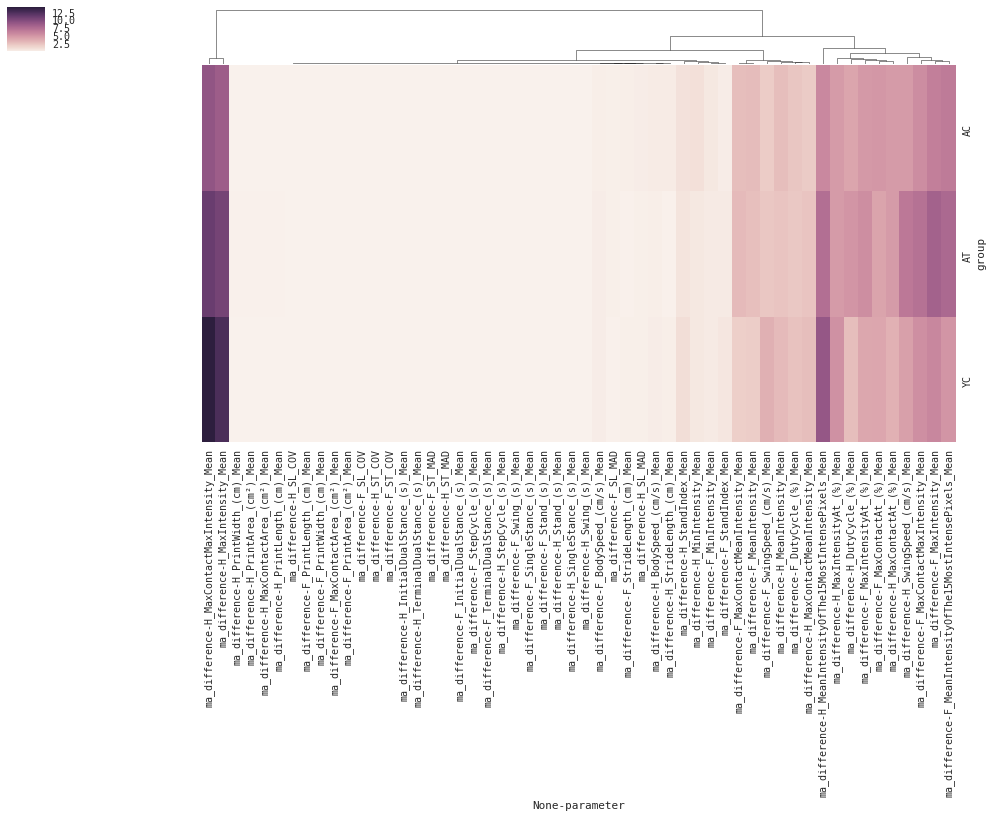

In [50]:
sns.clustermap(
    madiff.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Covariance

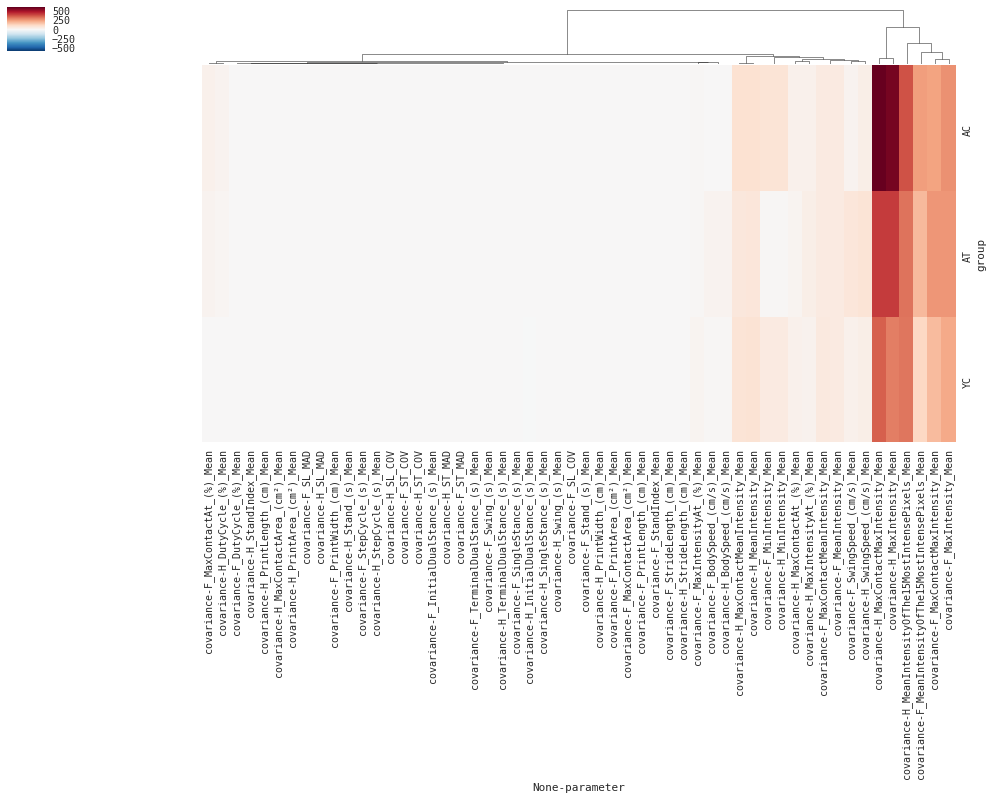

In [51]:
sns.clustermap(
    covs.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Mean squared error

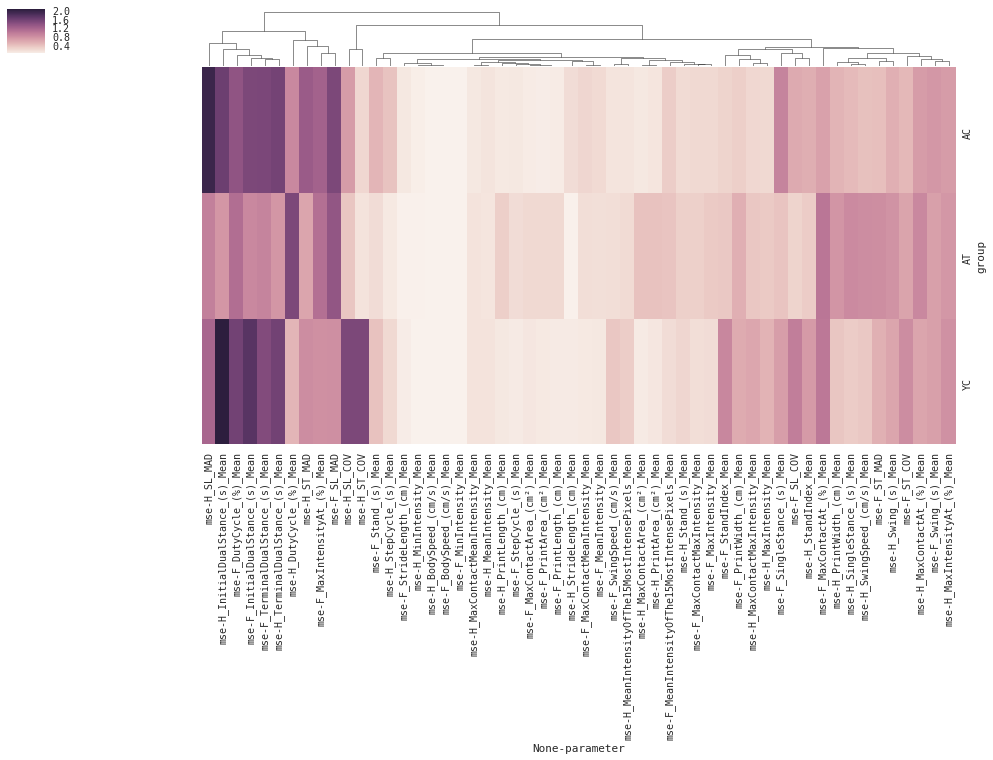

In [52]:
sns.clustermap(
    mse.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

# gait index

### 1. I'd like to know which variables seem promising: which are different between groups with p-value < 0.05?

In [32]:
selectedYA, _ = sel_anova(d, md['Group'], mode = 'classif')

print("Features selected by f_regression")
significantYA = selectedYA.ix[selectedYA.pval < 0.05]
significantYA

Features selected by f_regression


,param,pval
0,mouse length (cm),5.771471e-16
100,FP_PrintLength_(cm)_Mean,1.274370e-14
54,LF_PrintLength_(cm)_Mean,5.442695e-14
8,RF_PrintLength_(cm)_Mean,1.743071e-13
123,HP_PrintLength_(cm)_Mean,1.799055e-12
77,LH_PrintLength_(cm)_Mean,2.718884e-12
31,RH_PrintLength_(cm)_Mean,5.487773e-11
97,FP_MaxContactArea_(cm²)_Mean,8.070878e-10
5,RF_MaxContactArea_(cm²)_Mean,9.771617e-10
102,FP_PrintArea_(cm²)_Mean,2.148454e-09


### 2. Can I combine them to some reasonable index? (gait / age index)

I am going to define RI as the weighted average of all parameters, where weights: 1/p-value:
RI = parameter * (1/pval), [0,1]

In [33]:
GI = GI_calculate(d, GI_get_weights(d, md,groups='Y-A'))
GI

Group  Group_All  Animal
Y      YC         1.1       0.291585
                  1.2       0.188509
                  1.3       0.109361
                  1.4       0.110012
                  3.2       0.188299
                  3.3       0.000000
                  3.4       0.100800
                  4.1       0.197326
                  4.2       0.055679
                  4.3       0.142992
                  4.4       0.140019
                  5.1       0.237741
                  5.2       0.275204
                  5.3       0.293742
                  5.4       0.156669
A      AC         1.1       0.790470
                  1.2       0.706072
                  1.3       0.181107
                  1.4       0.533828
                  2.1       0.804847
                  2.2       0.626384
                  2.3       0.900883
                  2.4       0.814118
                  3.1       0.911888
                  3.2       1.000000
       AT         1.1       0.636190
             

In [34]:
# cross-validate on the dataset: how well can a subset of data
# recreate RI for a hidden portion of data?
# The mean diffrence is
pd.concat(GI_CV(d, md, n_trials = 100, test_size=0.25)).mean()

0.0702044519075566

'cross-validate' on the dataset: how well can a subset of data
recreate RI for a hidden portion of data?
The mean diffrence is
about 7%

Let's plot the Index

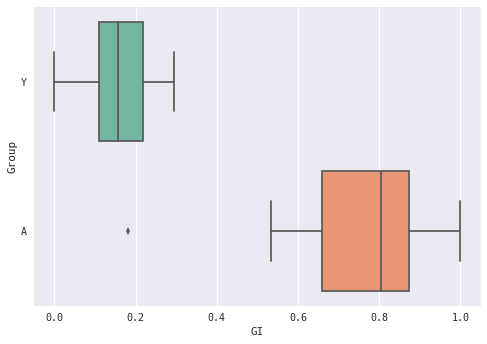

In [35]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', palette=color_map);

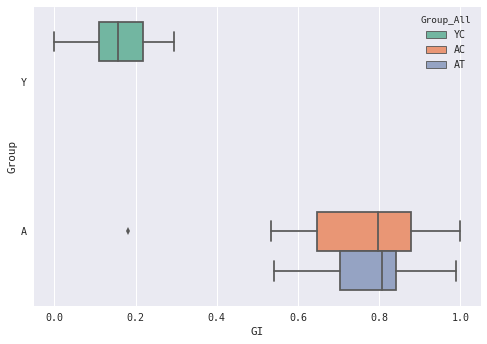

In [36]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', hue='Group_All', palette = color_mapYAT);

# gait index - again,only p-values are derived from comparison of YC to AC

In [37]:
# MODIFICATION: Compare only groups Young Control and Aged Control
selectedYAT, _ = sel_anova(d.ix[md['Group_All']!='AT'],
                md.ix[md['Group_All']!='AT']['Group_All'], mode = 'classif')

print("Features selected by f_regression")
significantYAT = selectedYAT.ix[selectedYAT.pval < 0.05]
significantYAT

Features selected by f_regression


,param,pval
0,mouse length (cm),1.954270e-08
100,FP_PrintLength_(cm)_Mean,6.228406e-07
54,LF_PrintLength_(cm)_Mean,8.378691e-07
8,RF_PrintLength_(cm)_Mean,1.079074e-06
64,LF_StrideLength_(cm)_Mean,2.586839e-06
110,FP_StrideLength_(cm)_Mean,3.167068e-06
136,HP_SingleStance_(s)_Mean,5.935064e-06
18,RF_StrideLength_(cm)_Mean,6.707434e-06
90,LH_SingleStance_(s)_Mean,7.976687e-06
77,LH_PrintLength_(cm)_Mean,8.713701e-06


### 2. Can I combine them to some reasonable index? (gait / age index)

I am going to define RI as the weighted average of all parameters, where weights: 1/p-value:
RI = parameter * (1/pval), [0,1]

In [38]:
GI = GI_calculate(d, GI_get_weights(d, md, groups="YC-AC"))
GI

Group  Group_All  Animal
Y      YC         1.1       0.298010
                  1.2       0.194616
                  1.3       0.124013
                  1.4       0.117386
                  3.2       0.190085
                  3.3       0.000000
                  3.4       0.106767
                  4.1       0.202216
                  4.2       0.067377
                  4.3       0.145218
                  4.4       0.143830
                  5.1       0.241953
                  5.2       0.274813
                  5.3       0.286119
                  5.4       0.154801
A      AC         1.1       0.790093
                  1.2       0.712262
                  1.3       0.195365
                  1.4       0.540438
                  2.1       0.813655
                  2.2       0.635886
                  2.3       0.909640
                  2.4       0.822605
                  3.1       0.913257
                  3.2       1.000000
       AT         1.1       0.642991
             

In [39]:
# cross-validate on the dataset: how well can a subset of data
# recreate RI for a hidden portion of data?
# The mean diffrence is
pd.concat(GI_CV(d, md, n_trials = 100, test_size=0.25)).mean()

0.07170153001293299

'cross-validate' on the dataset: how well can a subset of data
recreate RI for a hidden portion of data?
The mean diffrence is
about 7%

Let's plot the Index

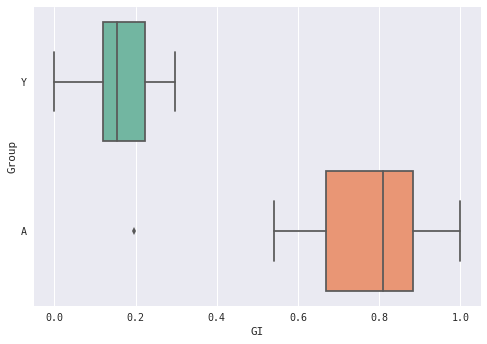

In [40]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', palette = color_map);

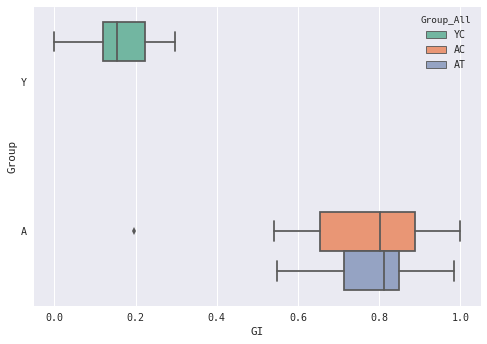

In [41]:
GI_ = GI.reset_index().rename(columns={0:'GI'})
sns.boxplot(data=GI_, x='GI', y='Group', hue='Group_All', palette = color_mapYAT);

The p-values of anova-based selection of parameters are very similar for comparison between:

a) YC and AC+AT

b) YC and AC

# Comparison of right and left side parameters

In [42]:
d_plot = plot_L_R(d, use_level=0)

In [43]:
d_plot

,Group,parameter,Animal,L,R
0,A,H_Stand_(s)_Mean,1.1,1.762925,1.095415
1,A,H_Stand_(s)_Mean,1.2,2.648285,1.628557
2,A,H_Stand_(s)_Mean,1.3,0.591314,0.123929
3,A,H_Stand_(s)_Mean,1.4,-1.533314,-1.161822
4,A,H_Stand_(s)_Mean,2.1,-0.191816,0.330068
5,A,H_Stand_(s)_Mean,2.2,-0.723378,-0.807088
6,A,H_Stand_(s)_Mean,2.3,-0.953989,-0.990331
7,A,H_Stand_(s)_Mean,2.4,-2.106376,-2.205211
8,A,H_Stand_(s)_Mean,3.1,3.103132,3.368047
9,A,H_Stand_(s)_Mean,3.2,0.686684,2.015258


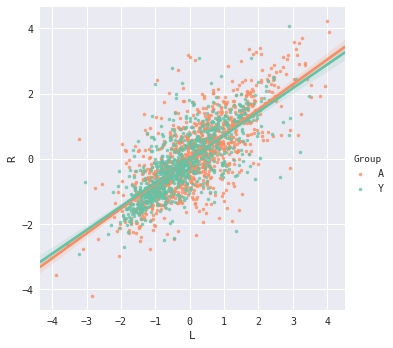

In [44]:
sns.lmplot(x='L', y='R', data=d_plot, hue='Group',  markers=".", palette=color_map);

Each point on the plot represents a sided parameter.

In [45]:
d_plot.groupby('Group').mean()

,L,R
Group,,
A,0.143339,0.108834
Y,-0.191119,-0.145112


The table shows the mean value of the left and right side parameters in young and aged mice. Collapsing mice to correlation isn't a good choice because one mouse may have damaged left brain side and another right, which would cancel out.
This may be assessed with errors / stdev.

In [46]:
d_plot.groupby('Group').std()

,L,R
Group,,
A,1.138195,1.173607
Y,1.029833,1.011619


The table shows standard deviation of the left and right side parameters in young and aged mice. There may be some difference? But small.

# Correlations between right and left side parameters

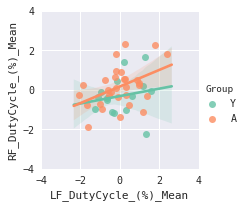

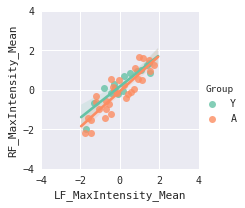

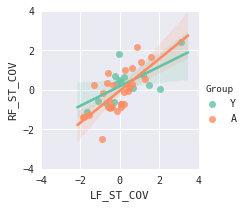

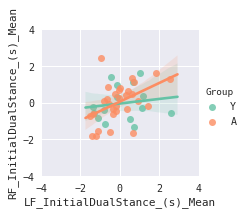

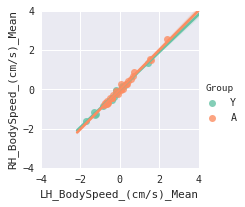

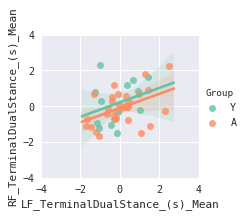

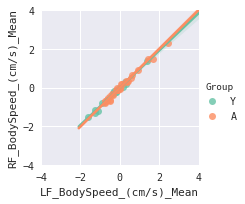

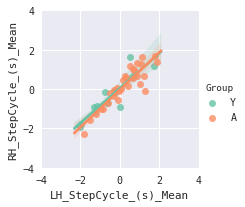

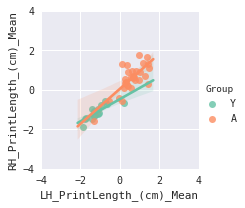

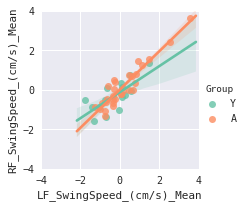

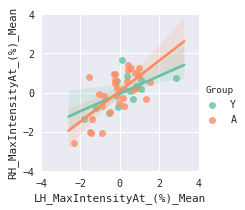

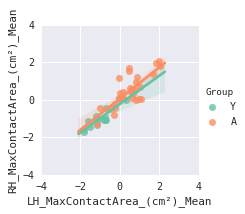

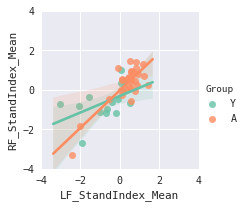

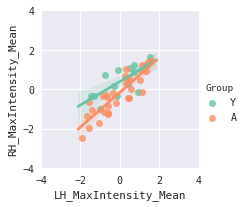

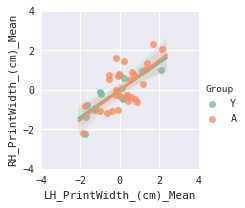

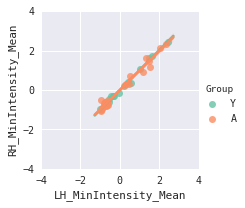

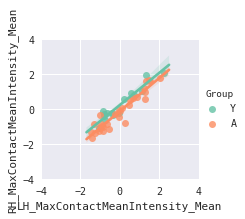

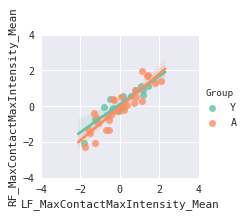

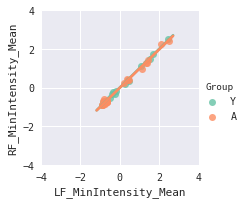

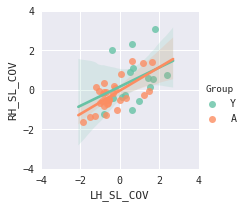

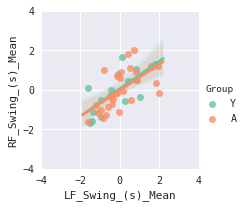

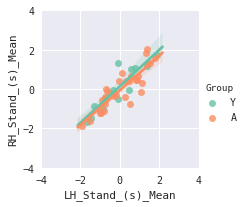

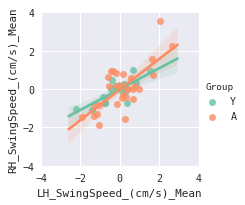

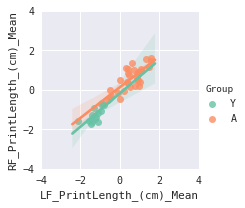

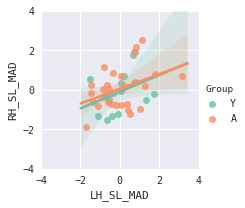

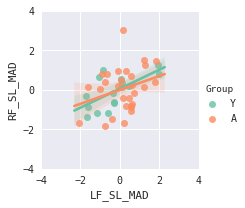

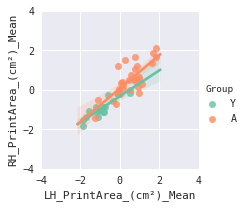

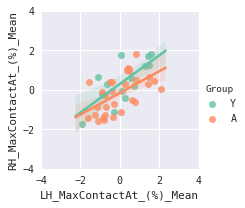

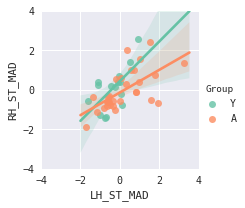

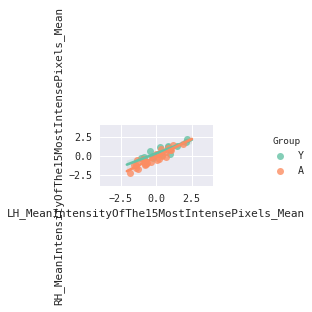

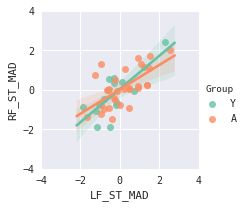

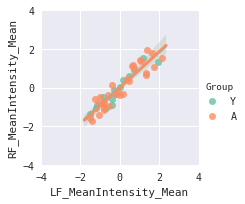

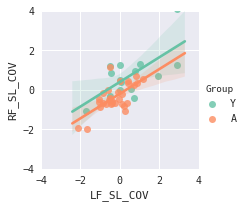

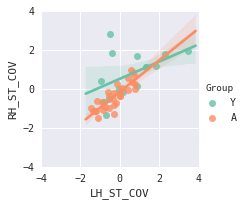

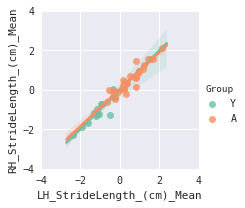

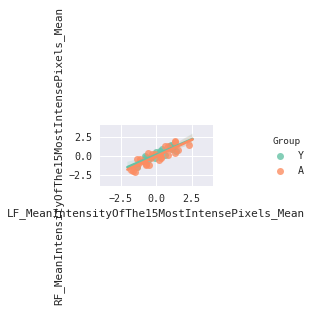

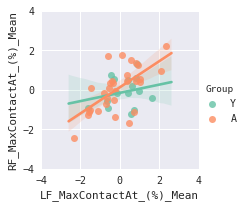

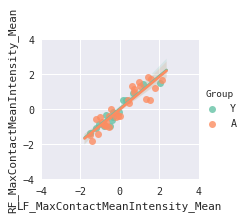

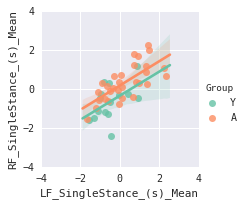

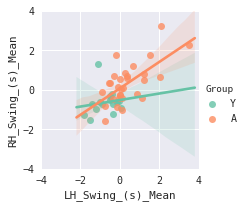

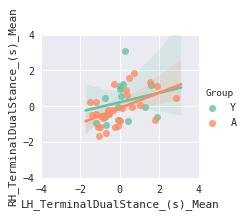

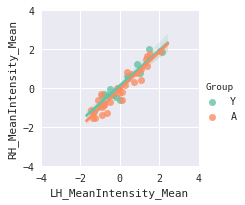

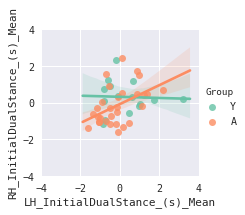

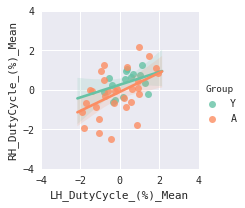

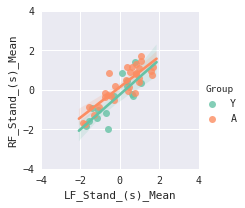

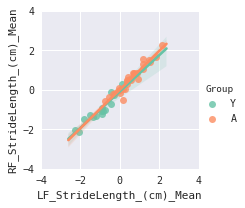

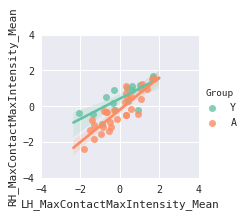

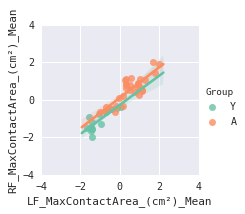

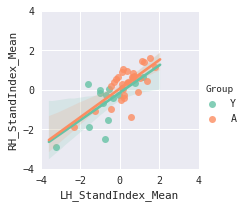

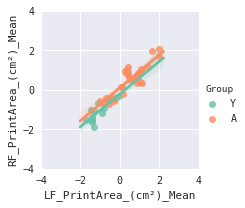

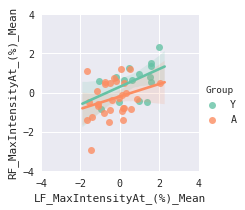

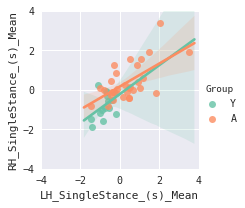

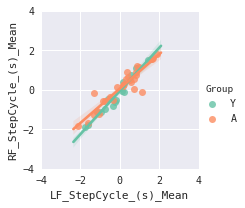

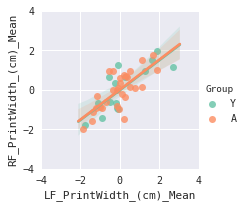

In [47]:
plot_relationships(d, palette=color_map, cut = [-4,4])

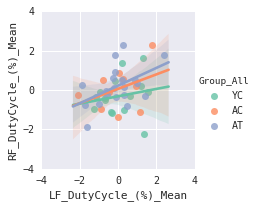

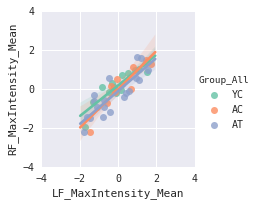

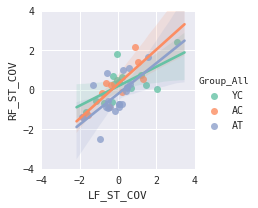

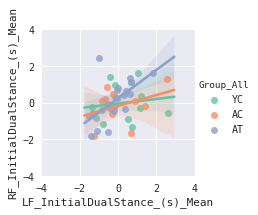

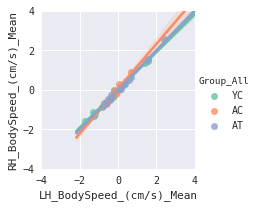

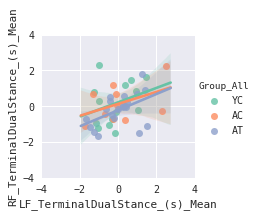

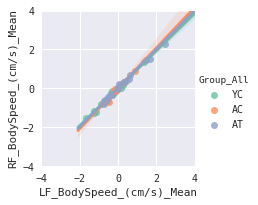

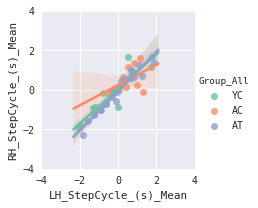

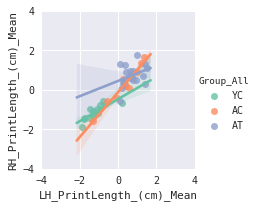

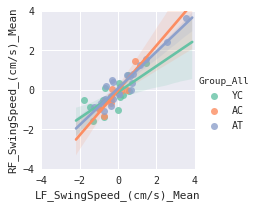

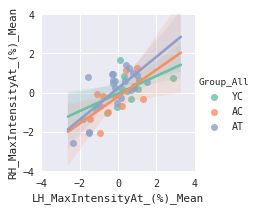

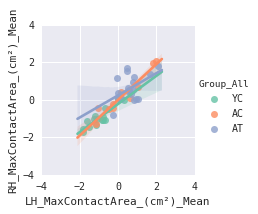

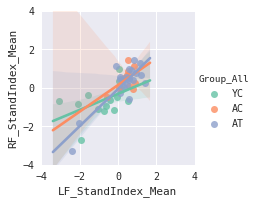

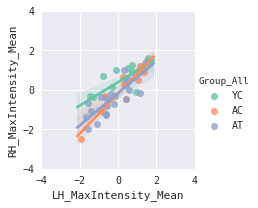

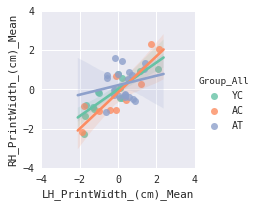

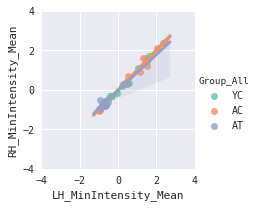

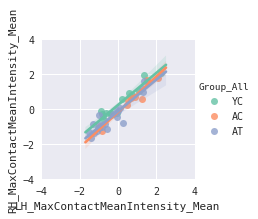

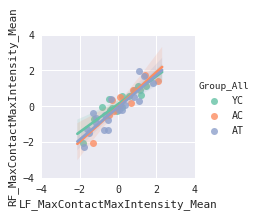

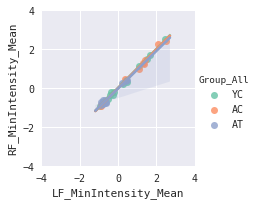

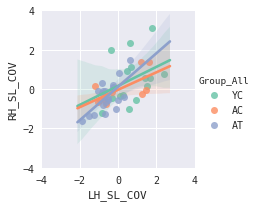

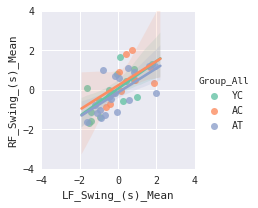

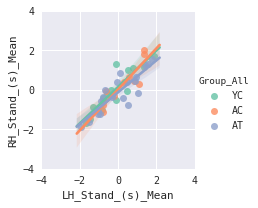

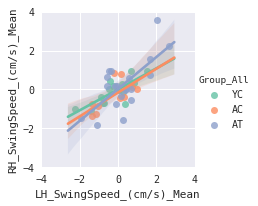

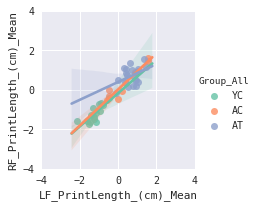

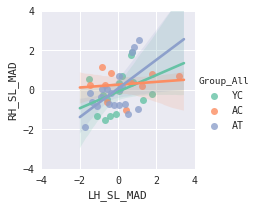

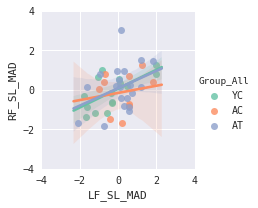

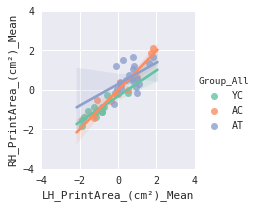

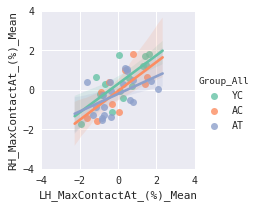

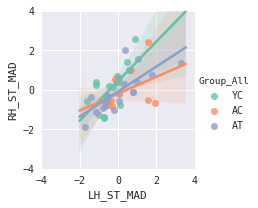

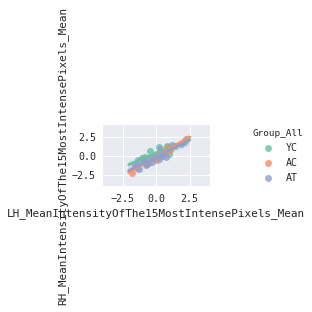

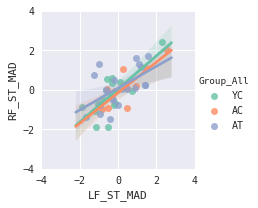

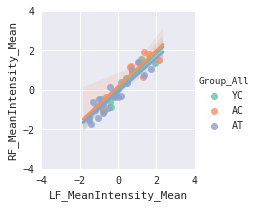

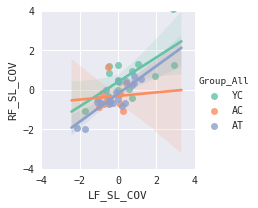

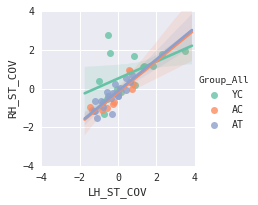

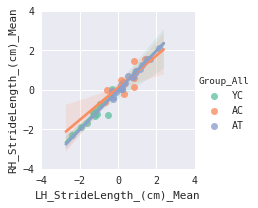

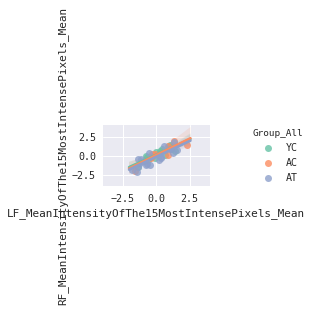

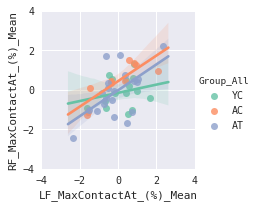

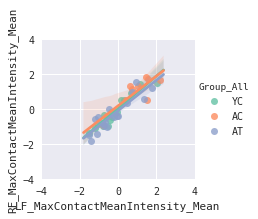

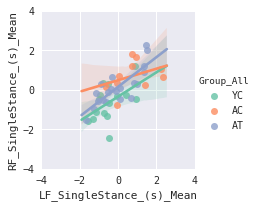

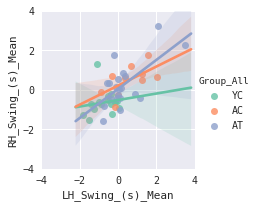

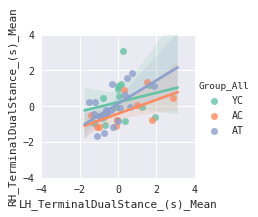

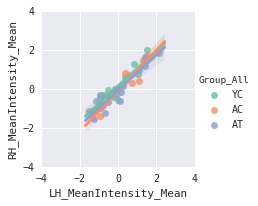

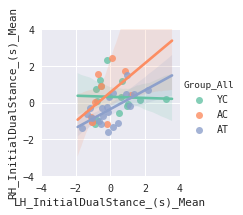

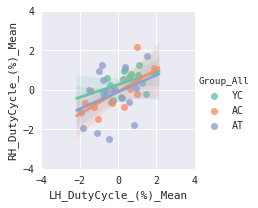

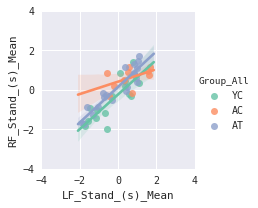

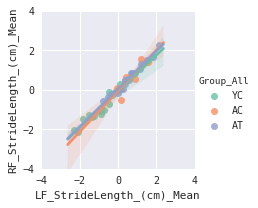

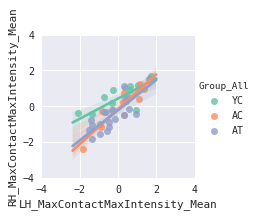

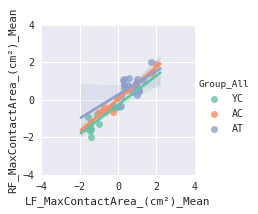

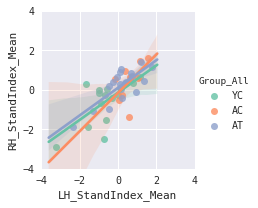

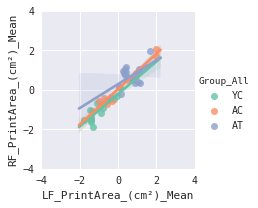

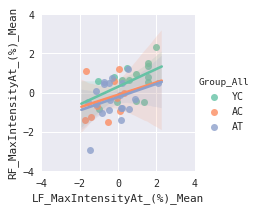

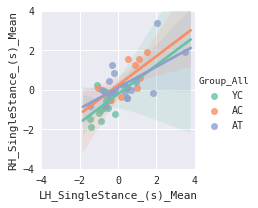

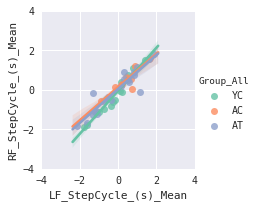

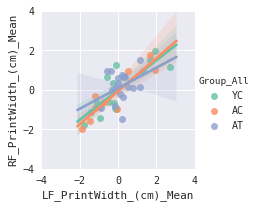

In [48]:
plot_relationships(d, palette=color_mapYAT, hue = "Group_All", cut = [-4,4])

- comparison of which of those makes sense?
- some are pretty scattered.